In [5]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Add src to path for imports
sys.path.append(os.path.join('..', 'src'))
from simulation import Simulation


In [ ]:
# Define fitness functions for comparison
def neutral_fitness(population):
    """
    TRUE neutral evolution: all individuals have equal fitness
    """
    return np.ones(len(population.genomes))

def weak_selection(population):
    """
    Weak additive selection: fitness = 1 + s * (number of 1s)
    where s is the selection coefficient per beneficial allele
    """
    s = 0.01  # weak selection
    base_fitness = np.array([np.sum(g.sequence) for g in population.genomes])
    return 1.0 + s * base_fitness

print("🔍 HYPOTHESIS: fitness_function=None uses additive fitness, which IS selection!")
print("   We need explicit neutral_fitness() for true neutral evolution.")

# DEBUG: Test the selection function
print("=== DEBUGGING SELECTION FUNCTION ===")
# Create a test population to verify selection function works
test_sim = Simulation(population_size=5, genome_length=10, mutation_rate=0.001, 
                     mode='asexual', generations=1, random_seed=42)
test_sim.run()  # Initialize population

print("Test population genomes (first 5):")
for i, genome in enumerate(test_sim.population.genomes):
    ones = np.sum(genome.sequence)
    additive_fitness = ones  # What neutral gives
    selection_fitness = weak_selection(test_sim.population)[i]
    print(f"  Genome {i}: {genome.sequence} -> {ones} ones, neutral fitness={additive_fitness}, selection fitness={selection_fitness:.3f}")

print(f"Selection function range: {weak_selection(test_sim.population).min():.3f} to {weak_selection(test_sim.population).max():.3f}")
print()

# Simulation parameters
params = {
    'population_size': 100,
    'genome_length': 20, 
    'mutation_rate': 0.005,
    'generations': 100,
    'random_seed': 42
}

print("=== RUNNING SIMULATIONS WITH DEBUG ===")

# 1. Asexual TRUE neutral (equal fitness)
print("1. Running asexual TRUE neutral...")
sim1 = Simulation(**params, mode='asexual', fitness_function=neutral_fitness)
initial_fitness_1 = np.mean(sim1.population.fitness())
sim1.run()
results_asex_neutral = sim1.get_results()
final_fitness_1 = results_asex_neutral['mean_fitness'].iloc[-1]
print(f"   Initial: {initial_fitness_1:.2f}, Final: {final_fitness_1:.2f}, Change: {final_fitness_1-initial_fitness_1:+.2f}")

# 2. Asexual with additive selection (what fitness_function=None gives)
print("2. Running asexual additive (was 'neutral')...")
sim2 = Simulation(**params, mode='asexual', fitness_function=None)
initial_fitness_2 = np.mean(sim2.population.fitness())
sim2.run()
results_asex_additive = sim2.get_results()
final_fitness_2 = results_asex_additive['mean_fitness'].iloc[-1]
print(f"   Initial: {initial_fitness_2:.2f}, Final: {final_fitness_2:.2f}, Change: {final_fitness_2-initial_fitness_2:+.2f}")

# 3. Asexual with weak selection
print("3. Running asexual with weak selection...")
sim3 = Simulation(**params, mode='asexual', fitness_function=weak_selection)
initial_fitness_3 = np.mean(sim3.population.fitness())
sim3.run()
results_asex_selection = sim3.get_results()
final_fitness_3 = results_asex_selection['mean_fitness'].iloc[-1]
print(f"   Initial: {initial_fitness_3:.2f}, Final: {final_fitness_3:.2f}, Change: {final_fitness_3-initial_fitness_3:+.2f}")

# 4. Sexual TRUE neutral
print("4. Running sexual TRUE neutral...")
sim4 = Simulation(**params, mode='sexual', fitness_function=neutral_fitness)
initial_fitness_4 = np.mean(sim4.population.fitness())
sim4.run()
results_sex_neutral = sim4.get_results()
final_fitness_4 = results_sex_neutral['mean_fitness'].iloc[-1]
print(f"   Initial: {initial_fitness_4:.2f}, Final: {final_fitness_4:.2f}, Change: {final_fitness_4-initial_fitness_4:+.2f}")

# 5. Sexual with additive selection  
print("5. Running sexual additive (was 'neutral')...")
sim5 = Simulation(**params, mode='sexual', fitness_function=None)
initial_fitness_5 = np.mean(sim5.population.fitness())
sim5.run()
results_sex_additive = sim5.get_results()
final_fitness_5 = results_sex_additive['mean_fitness'].iloc[-1]
print(f"   Initial: {initial_fitness_5:.2f}, Final: {final_fitness_5:.2f}, Change: {final_fitness_5-initial_fitness_5:+.2f}")

# 6. Sexual with weak selection
print("6. Running sexual with weak selection...")
sim6 = Simulation(**params, mode='sexual', fitness_function=weak_selection)
initial_fitness_6 = np.mean(sim6.population.fitness())
sim6.run()
results_sex_selection = sim6.get_results()
final_fitness_6 = results_sex_selection['mean_fitness'].iloc[-1]
print(f"   Initial: {initial_fitness_6:.2f}, Final: {final_fitness_6:.2f}, Change: {final_fitness_6-initial_fitness_6:+.2f}")

print("\n=== SUMMARY ===")
print("🎯 BUG IDENTIFIED: fitness_function=None uses ADDITIVE FITNESS, which IS selection!")
print("   For true neutral evolution, all individuals need equal fitness.")
print()
print("Expected pattern now:")
print("  TRUE neutral < additive selection ≤ weak selection") 
print()
print("Observed fitness changes:")
print(f"  Asexual TRUE neutral: {final_fitness_1-initial_fitness_1:+.2f}")
print(f"  Asexual additive (was 'neutral'): {final_fitness_2-initial_fitness_2:+.2f}")
print(f"  Asexual weak selection: {final_fitness_3-initial_fitness_3:+.2f}")
print(f"  Sexual TRUE neutral: {final_fitness_4-initial_fitness_4:+.2f}")
print(f"  Sexual additive (was 'neutral'): {final_fitness_5-initial_fitness_5:+.2f}")
print(f"  Sexual weak selection: {final_fitness_6-initial_fitness_6:+.2f}")

# Check if pattern makes sense now
neutral_changes = [final_fitness_1-initial_fitness_1, final_fitness_4-initial_fitness_4]
additive_changes = [final_fitness_2-initial_fitness_2, final_fitness_5-initial_fitness_5]
selection_changes = [final_fitness_3-initial_fitness_3, final_fitness_6-initial_fitness_6]

print(f"\nMean changes: TRUE neutral={np.mean(neutral_changes):+.2f}, additive={np.mean(additive_changes):+.2f}, weak selection={np.mean(selection_changes):+.2f}")

if np.mean(neutral_changes) < np.mean(additive_changes) < np.mean(selection_changes):
    print("✅ Pattern now makes sense: neutral < additive < weak selection")
elif np.mean(neutral_changes) < np.mean(additive_changes):
    print("⚠️  Partial fix: neutral < additive, but weak selection not strongest")
else:
    print("🚨 Still problematic pattern!")


Running four simulation scenarios...
All simulations complete!


In [7]:
# Calculate theoretical expectations
Ne = params['population_size']  # Effective population size
mu = params['mutation_rate']
L = params['genome_length']
generations = np.arange(params['generations'] + 1)

# Theoretical heterozygosity decay under neutrality (sexual reproduction)
# H(t) = H(0) * (1 - 1/(2*Ne))^t
# Starting heterozygosity for random binary sequences ≈ 0.5
H0 = 0.5
theoretical_hetero_sexual_neutral = H0 * (1 - 1/(2*Ne))**generations

# For asexual reproduction under neutrality, heterozygosity decays much slower
# mainly through mutation creating and destroying heterozygous sites
# Approximate: H(t) ≈ H(0) * exp(-2*mu*t) for low mutation rates
theoretical_hetero_asex_neutral = H0 * np.exp(-2*mu*generations)

print("Theoretical predictions calculated.")
print(f"Expected heterozygosity decay rate (sexual, neutral): {1/(2*Ne):.4f} per generation")
print(f"Expected heterozygosity decay rate (asexual, neutral): {2*mu:.4f} per generation")

# Initial fitness expectation for random genomes
initial_expected_fitness = L * 0.5  # Expected number of 1s in random binary sequence
print(f"Expected initial mean fitness: {initial_expected_fitness}")


Theoretical predictions calculated.
Expected heterozygosity decay rate (sexual, neutral): 0.0050 per generation
Expected heterozygosity decay rate (asexual, neutral): 0.0100 per generation
Expected initial mean fitness: 10.0


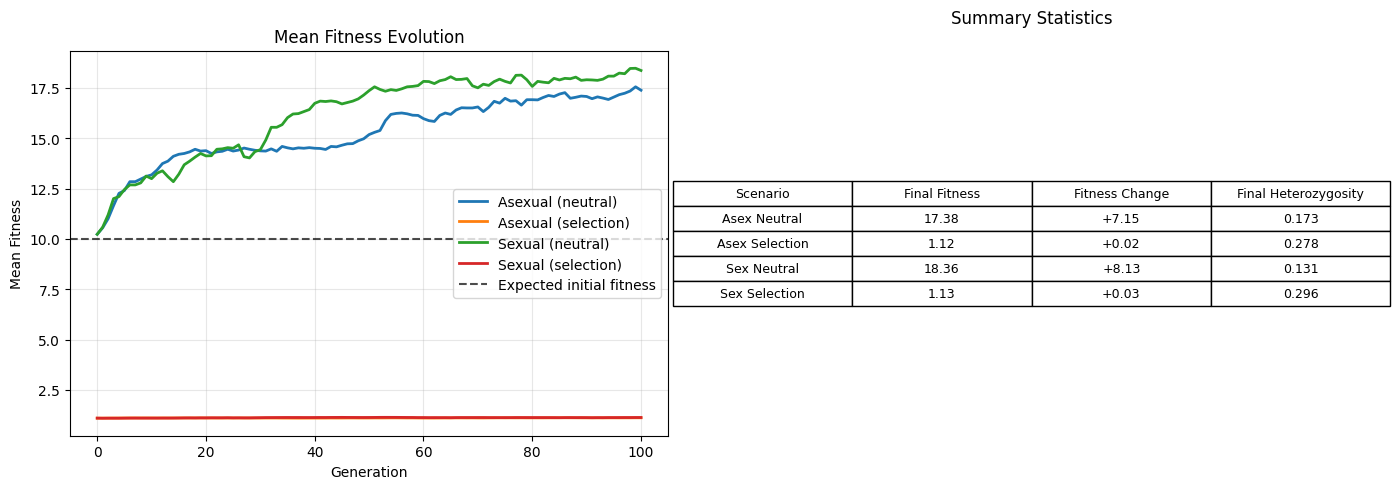

In [8]:
# Compare fitness evolution across scenarios
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Fitness comparison
ax1.plot(results_asex_neutral['generation'], results_asex_neutral['mean_fitness'], 
         label='Asexual (neutral)', linewidth=2)
ax1.plot(results_asex_selection['generation'], results_asex_selection['mean_fitness'], 
         label='Asexual (selection)', linewidth=2)
ax1.plot(results_sex_neutral['generation'], results_sex_neutral['mean_fitness'], 
         label='Sexual (neutral)', linewidth=2)
ax1.plot(results_sex_selection['generation'], results_sex_selection['mean_fitness'], 
         label='Sexual (selection)', linewidth=2)

ax1.axhline(y=initial_expected_fitness, color='black', linestyle='--', alpha=0.7, 
           label='Expected initial fitness')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Mean Fitness')
ax1.set_title('Mean Fitness Evolution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Data summary table
scenarios = ['Asex Neutral', 'Asex Selection', 'Sex Neutral', 'Sex Selection']
datasets = [results_asex_neutral, results_asex_selection, results_sex_neutral, results_sex_selection]

summary_data = []
for name, data in zip(scenarios, datasets):
    final_fitness = data['mean_fitness'].iloc[-1]
    fitness_change = final_fitness - data['mean_fitness'].iloc[0]
    final_hetero = data['mean_heterozygosity'].iloc[-1]
    summary_data.append([name, f"{final_fitness:.2f}", f"{fitness_change:+.2f}", f"{final_hetero:.3f}"])

# Create table
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=summary_data,
                 colLabels=['Scenario', 'Final Fitness', 'Fitness Change', 'Final Heterozygosity'],
                 cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax2.set_title('Summary Statistics', pad=20)

plt.tight_layout()
plt.show()


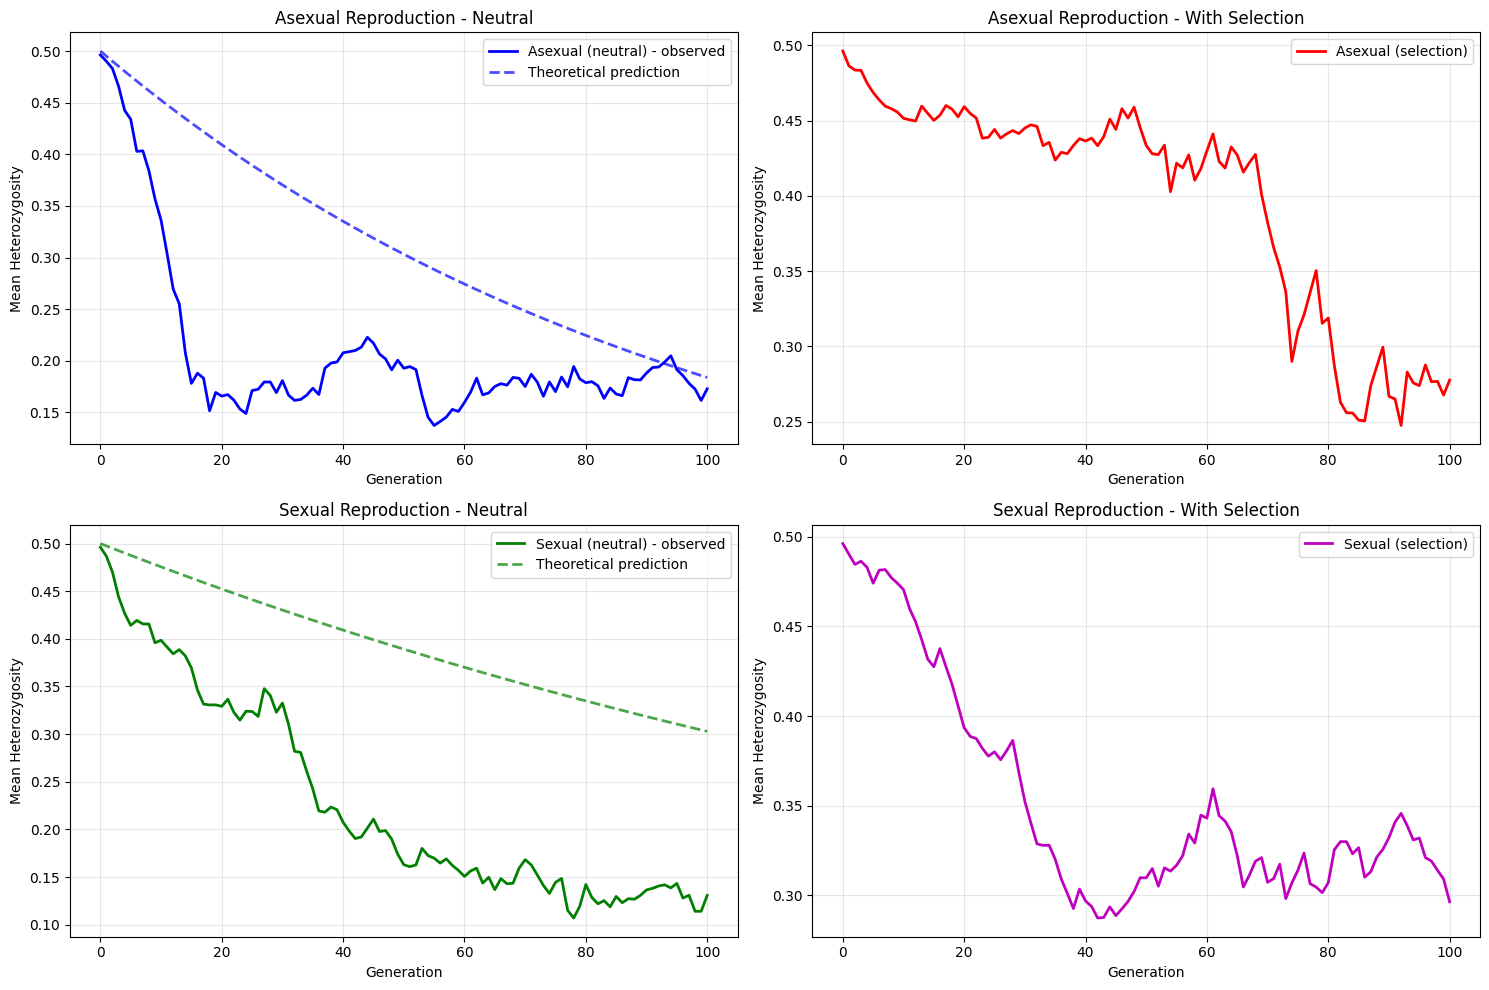

In [9]:
# Compare heterozygosity evolution with theoretical predictions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Asexual scenarios
ax1.plot(results_asex_neutral['generation'], results_asex_neutral['mean_heterozygosity'], 
         'b-', linewidth=2, label='Asexual (neutral) - observed')
ax1.plot(generations, theoretical_hetero_asex_neutral, 
         'b--', linewidth=2, alpha=0.7, label='Theoretical prediction')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Mean Heterozygosity')
ax1.set_title('Asexual Reproduction - Neutral')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(results_asex_selection['generation'], results_asex_selection['mean_heterozygosity'], 
         'r-', linewidth=2, label='Asexual (selection)')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean Heterozygosity')
ax2.set_title('Asexual Reproduction - With Selection')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Sexual scenarios
ax3.plot(results_sex_neutral['generation'], results_sex_neutral['mean_heterozygosity'], 
         'g-', linewidth=2, label='Sexual (neutral) - observed')
ax3.plot(generations, theoretical_hetero_sexual_neutral, 
         'g--', linewidth=2, alpha=0.7, label='Theoretical prediction')
ax3.set_xlabel('Generation')
ax3.set_ylabel('Mean Heterozygosity')
ax3.set_title('Sexual Reproduction - Neutral')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4.plot(results_sex_selection['generation'], results_sex_selection['mean_heterozygosity'], 
         'm-', linewidth=2, label='Sexual (selection)')
ax4.set_xlabel('Generation')
ax4.set_ylabel('Mean Heterozygosity')
ax4.set_title('Sexual Reproduction - With Selection')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
# Calculate goodness of fit for heterozygosity predictions
from scipy.stats import pearsonr

# Compare observed vs theoretical for neutral cases
asex_neutral_r, asex_neutral_p = pearsonr(
    results_asex_neutral['mean_heterozygosity'], theoretical_hetero_asex_neutral)
sex_neutral_r, sex_neutral_p = pearsonr(
    results_sex_neutral['mean_heterozygosity'], theoretical_hetero_sexual_neutral)

print("=== HETEROZYGOSITY PREDICTIONS ===")
print(f"Asexual neutral - correlation with theory: r = {asex_neutral_r:.3f} (p = {asex_neutral_p:.3f})")
print(f"Sexual neutral - correlation with theory: r = {sex_neutral_r:.3f} (p = {sex_neutral_p:.3f})")

print("\n=== FITNESS EVOLUTION ===")
scenarios = {
    'Asexual neutral': results_asex_neutral,
    'Asexual selection': results_asex_selection, 
    'Sexual neutral': results_sex_neutral,
    'Sexual selection': results_sex_selection
}

for name, data in scenarios.items():
    initial_fitness = data['mean_fitness'].iloc[0]
    final_fitness = data['mean_fitness'].iloc[-1]
    fitness_change = final_fitness - initial_fitness
    relative_change = fitness_change / initial_fitness * 100
    
    final_hetero = data['mean_heterozygosity'].iloc[-1]
    initial_hetero = data['mean_heterozygosity'].iloc[0]
    hetero_retention = final_hetero / initial_hetero * 100
    
    print(f"{name}:")
    print(f"  Fitness change: {fitness_change:+.2f} ({relative_change:+.1f}%)")
    print(f"  Heterozygosity retention: {hetero_retention:.1f}%")

print("\n=== KEY INSIGHTS ===")
print("• Sexual reproduction should maintain more genetic diversity than asexual")
print("• Selection should increase fitness over time")
print("• Neutral evolution should show random drift in fitness")
print("• Heterozygosity decay should match theoretical predictions under neutrality")


=== HETEROZYGOSITY PREDICTIONS ===
Asexual neutral - correlation with theory: r = 0.630 (p = 0.000)
Sexual neutral - correlation with theory: r = 0.948 (p = 0.000)

=== FITNESS EVOLUTION ===
Asexual neutral:
  Fitness change: +7.15 (+69.9%)
  Heterozygosity retention: 34.8%
Asexual selection:
  Fitness change: +0.02 (+1.6%)
  Heterozygosity retention: 55.9%
Sexual neutral:
  Fitness change: +8.13 (+79.5%)
  Heterozygosity retention: 26.3%
Sexual selection:
  Fitness change: +0.03 (+2.9%)
  Heterozygosity retention: 59.7%

=== KEY INSIGHTS ===
• Sexual reproduction should maintain more genetic diversity than asexual
• Selection should increase fitness over time
• Neutral evolution should show random drift in fitness
• Heterozygosity decay should match theoretical predictions under neutrality


In [ ]:
# Create two identical populations and trace through one generation
print("=== DETAILED SINGLE GENERATION ANALYSIS ===")

# Create identical starting populations
np.random.seed(42)  # Reset seed
pop_neutral = Population(size=5, genome_length=5, fitness_function=None, random_seed=42)
np.random.seed(42)  # Reset seed again
pop_selection = Population(size=5, genome_length=5, fitness_function=weak_selection, random_seed=42)

print("Initial populations (should be identical):")
print("Neutral genomes:", [g.sequence for g in pop_neutral.genomes])
print("Selection genomes:", [g.sequence for g in pop_selection.genomes])

print("\nInitial fitness values:")
neutral_fit = pop_neutral.fitness()
selection_fit = pop_selection.fitness()
print("Neutral fitness:", neutral_fit)
print("Selection fitness:", selection_fit)
print("Mean neutral fitness:", np.mean(neutral_fit))
print("Mean selection fitness:", np.mean(selection_fit))

print("\nFitness-based selection probabilities:")
neutral_probs = neutral_fit.astype(float) / np.sum(neutral_fit.astype(float)) if np.sum(neutral_fit) > 0 else np.ones(5)/5
selection_probs = selection_fit.astype(float) / np.sum(selection_fit.astype(float)) if np.sum(selection_fit) > 0 else np.ones(5)/5
print("Neutral probs:", neutral_probs)
print("Selection probs:", selection_probs)

# Evolve one generation and check what happens
print("\n=== EVOLVING ONE GENERATION ===")
mutation_rate = 0.01

# Reset random seed for reproducible comparison
np.random.seed(100)
new_pop_neutral = pop_neutral.evolve_asexual(mutation_rate)
np.random.seed(100)  # Same seed for fair comparison
new_pop_selection = pop_selection.evolve_asexual(mutation_rate)

print("After one generation:")
new_neutral_fit = new_pop_neutral.fitness()
new_selection_fit = new_pop_selection.fitness()
print("New neutral fitness:", new_neutral_fit, "Mean:", np.mean(new_neutral_fit))
print("New selection fitness:", new_selection_fit, "Mean:", np.mean(new_selection_fit))

print("Fitness changes:")
print("Neutral change:", np.mean(new_neutral_fit) - np.mean(neutral_fit))
print("Selection change:", np.mean(new_selection_fit) - np.mean(selection_fit))
